In [1]:
import numpy as np
import gudhi
from sklearn import datasets
import matplotlib.tri as tri
from IPython.html.widgets import interact
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
from mpl_toolkits.mplot3d import Axes3D 
import mpl_toolkits.mplot3d.art3d as art3d
import matplotlib

C:\Users\qoo36\anaconda3\lib\site-packages\IPython\html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [2]:
iris_data = datasets.load_iris().data
iris_label = datasets.load_iris().target


In [3]:
data = iris_data[:,-2:][0:150]

In [4]:
datasets.load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

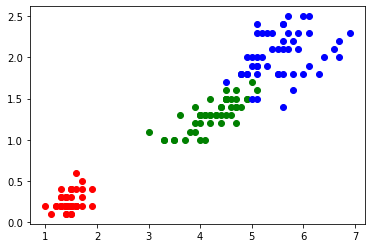

In [8]:
plt.clf()
plt.scatter(data[:,0][:50], data[:,1][:50], c = 'r')
plt.scatter(data[:,0][50:100], data[:,1][50:100], c = 'g')
plt.scatter(data[:,0][100:150], data[:,1][100:150], c = 'b')
plt.show()

In [ ]:
def display(radius):
    rips_complex = gudhi.RipsComplex(points=data,
                                     max_edge_length=radius)

    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    # simplex_tree.get_skeleton(2) 
    edges = np.array([data[[s[0][0],s[0][1]]] for s in simplex_tree.get_skeleton(1) if len(s[0])==2])

    triangles = np.array([s[0] for s in simplex_tree.get_skeleton(2) if len(s[0])==3])
    
    
    plt.clf()
    fig, ax = plt.subplots()
    
    circles = [plt.Circle((xi,yi), radius=radius, linewidth=0.7, facecolor=[166/255,142/255,218/255], fill = False) for xi,yi in zip(data[:,0],data[:,1])]
    for i in circles:
        ax.add_patch(i)
    
    # Plot triangles
    ax.tripcolor(data[:,0], data[:,1], triangles=triangles, color=[166/255,142/255,218/255], linewidth=0.1, facecolors=np.ones(len(triangles)), cmap = matplotlib.colors.ListedColormap("grey"))
    # Plot points
    ax.scatter(data[:,0], data[:,1], color = 'black',s = 5)
    # Plot edges
    for e in edges:
        ax.plot(e[:,0], e[:,1], color = 'r', linewidth=0.2)
    
    
    
    ax.set_xlim((0,9))
    ax.set_ylim((0,5))
    ax.axis('equal')
    ax.grid('on')
    plt.show()

In [ ]:
%matplotlib notebook
interact(display, radius=(0,1.))

In [ ]:
display(0.2)

In [50]:
rips_complex = gudhi.RipsComplex(points=data)

simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
barcode = simplex_tree.persistence()
barcode_dim0 = simplex_tree.persistence_intervals_in_dimension(0)
#barcode_dim1 = simplex_tree.persistence_intervals_in_dimension(1)

In [58]:
A = list(simplex_tree.get_filtration())
print(A)

[([0], 0.0), ([1], 0.0), ([0, 1], 0.0), ([2], 0.0), ([3], 0.0), ([4], 0.0), ([0, 4], 0.0), ([1, 4], 0.0), ([5], 0.0), ([6], 0.0), ([7], 0.0), ([3, 7], 0.0), ([8], 0.0), ([0, 8], 0.0), ([1, 8], 0.0), ([4, 8], 0.0), ([9], 0.0), ([10], 0.0), ([3, 10], 0.0), ([7, 10], 0.0), ([11], 0.0), ([12], 0.0), ([13], 0.0), ([14], 0.0), ([15], 0.0), ([16], 0.0), ([17], 0.0), ([6, 17], 0.0), ([18], 0.0), ([19], 0.0), ([20], 0.0), ([21], 0.0), ([15, 21], 0.0), ([22], 0.0), ([23], 0.0), ([24], 0.0), ([25], 0.0), ([11, 25], 0.0), ([26], 0.0), ([27], 0.0), ([3, 27], 0.0), ([7, 27], 0.0), ([10, 27], 0.0), ([28], 0.0), ([0, 28], 0.0), ([1, 28], 0.0), ([4, 28], 0.0), ([8, 28], 0.0), ([29], 0.0), ([11, 29], 0.0), ([25, 29], 0.0), ([30], 0.0), ([11, 30], 0.0), ([25, 30], 0.0), ([29, 30], 0.0), ([31], 0.0), ([15, 31], 0.0), ([21, 31], 0.0), ([32], 0.0), ([9, 32], 0.0), ([33], 0.0), ([0, 33], 0.0), ([1, 33], 0.0), ([4, 33], 0.0), ([8, 33], 0.0), ([28, 33], 0.0), ([34], 0.0), ([3, 34], 0.0), ([7, 34], 0.0), ([10, 

In [47]:
print('1. Rips complex is of dimension ', simplex_tree.dimension(), ' - ',
      simplex_tree.num_simplices(), ' simplices - ',
      simplex_tree.num_vertices(), ' vertices.')

1. Rips complex is of dimension  1  -  11325  simplices -  150  vertices.


In [48]:
num = simplex_tree.num_simplices()
while True:
    simplex_tree.collapse_edges(nb_iterations = 3)
    i += 1
    if num == simplex_tree.num_simplices():
        break
    if i >100:
        break
    num = simplex_tree.num_simplices()
    print(num)

491
439
416
399
397
395


In [35]:
for i in range(20):
    simplex_tree.collapse_edges(nb_iterations = 1)
    print('2. Rips complex is of dimension ', simplex_tree.dimension(), ' - ',
      simplex_tree.num_simplices(), ' simplices - ',
      simplex_tree.num_vertices(), ' vertices.')

'''simplex_tree.expansion(15)
diag = simplex_tree.persistence()
print('3. Rips complex is of dimension ', simplex_tree.dimension(), ' - ',
      simplex_tree.num_simplices(), ' simplices - ',
      simplex_tree.num_vertices(), ' vertices.')'''

2. Rips complex is of dimension  1  -  505  simplices -  150  vertices.
2. Rips complex is of dimension  1  -  458  simplices -  150  vertices.
2. Rips complex is of dimension  1  -  435  simplices -  150  vertices.
2. Rips complex is of dimension  1  -  424  simplices -  150  vertices.
2. Rips complex is of dimension  1  -  411  simplices -  150  vertices.
2. Rips complex is of dimension  1  -  405  simplices -  150  vertices.
2. Rips complex is of dimension  1  -  399  simplices -  150  vertices.
2. Rips complex is of dimension  1  -  398  simplices -  150  vertices.
2. Rips complex is of dimension  1  -  396  simplices -  150  vertices.
2. Rips complex is of dimension  1  -  395  simplices -  150  vertices.
2. Rips complex is of dimension  1  -  395  simplices -  150  vertices.
2. Rips complex is of dimension  1  -  395  simplices -  150  vertices.
2. Rips complex is of dimension  1  -  395  simplices -  150  vertices.
2. Rips complex is of dimension  1  -  395  simplices -  150  ve

"simplex_tree.expansion(15)\ndiag = simplex_tree.persistence()\nprint('3. Rips complex is of dimension ', simplex_tree.dimension(), ' - ',\n      simplex_tree.num_simplices(), ' simplices - ',\n      simplex_tree.num_vertices(), ' vertices.')"

In [44]:
simplex_tree.collapse_edges(nb_iterations = 5)
print('2. Rips complex is of dimension ', simplex_tree.dimension(), ' - ',
      simplex_tree.num_simplices(), ' simplices - ',
      simplex_tree.num_vertices(), ' vertices.')
simplex_tree.expansion(3)
diag = simplex_tree.persistence()

2. Rips complex is of dimension  1  -  456  simplices -  150  vertices.


In [27]:
A = simplex_tree.collapse_edges(nb_iterations = 3)
B = simplex_tree.expansion(30)

<Figure size 432x288 with 0 Axes>

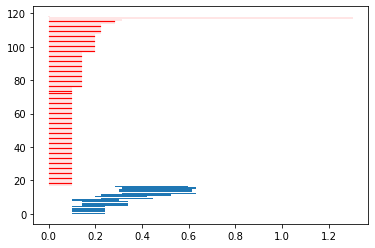

In [7]:
plt.clf()
fig, ax = plt.subplots()

for b_idx in range(len(barcode_dim1)):
#     print(b_idx-len(barcode_dim1))
    b_data = barcode_dim1[b_idx]
#     print((b_data[0],b_data[1]))
    ax.broken_barh([(b_data[0],b_data[1])], (b_idx, 0.8), lw = 1)
    
for b_idx in range(len(barcode_dim1), len(barcode_dim0)+len(barcode_dim1)):
# #     print(b_idx-len(barcode_dim1))
    b_data = barcode_dim0[b_idx-len(barcode_dim1)]
    ax.broken_barh([(b_data[0],b_data[1])], (b_idx, 0.2), lw = 0.2, color = 'r')

# # ax.set_ylim(0,102)
plt.show()